In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns 

In [2]:
#vget the data 
df=pd.read_excel('Exercise.xlsx')

In [3]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df.shape

(15000, 9)

In [8]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [9]:
hero=list(df.dtypes[df.dtypes=='object'].index)
for h in hero:
    df[h]=df[h].str.upper()

In [10]:
df['Gender']

0          MALE
1        FEMALE
2          MALE
3        FEMALE
4        FEMALE
          ...  
14995    FEMALE
14996    FEMALE
14997    FEMALE
14998      MALE
14999      MALE
Name: Gender, Length: 15000, dtype: object

In [11]:
num_cols=['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

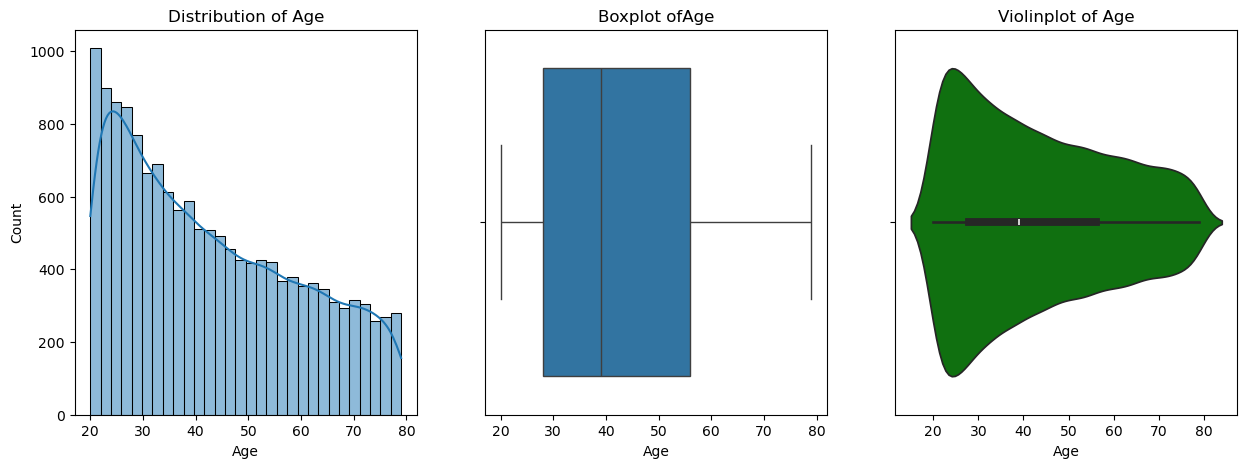

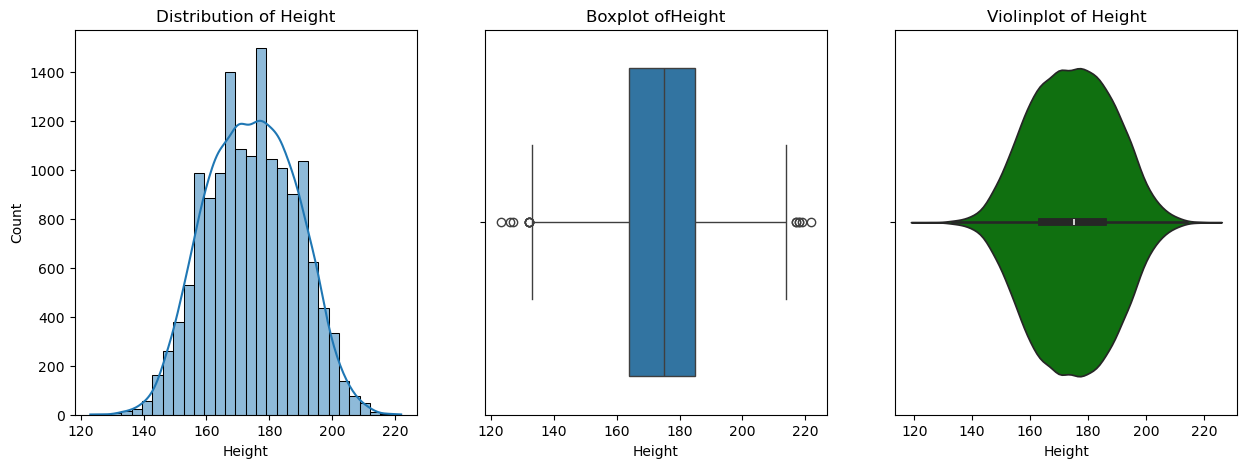

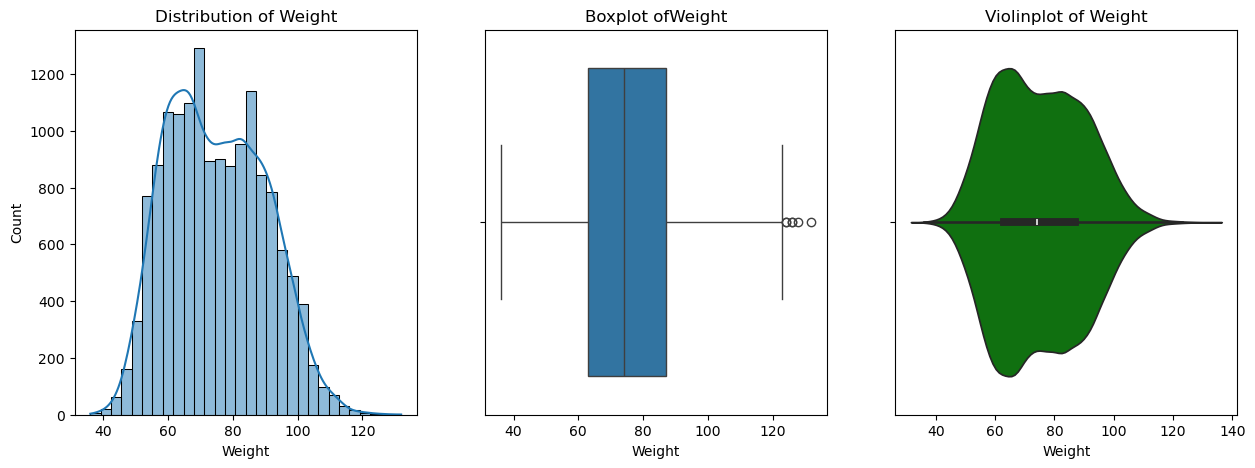

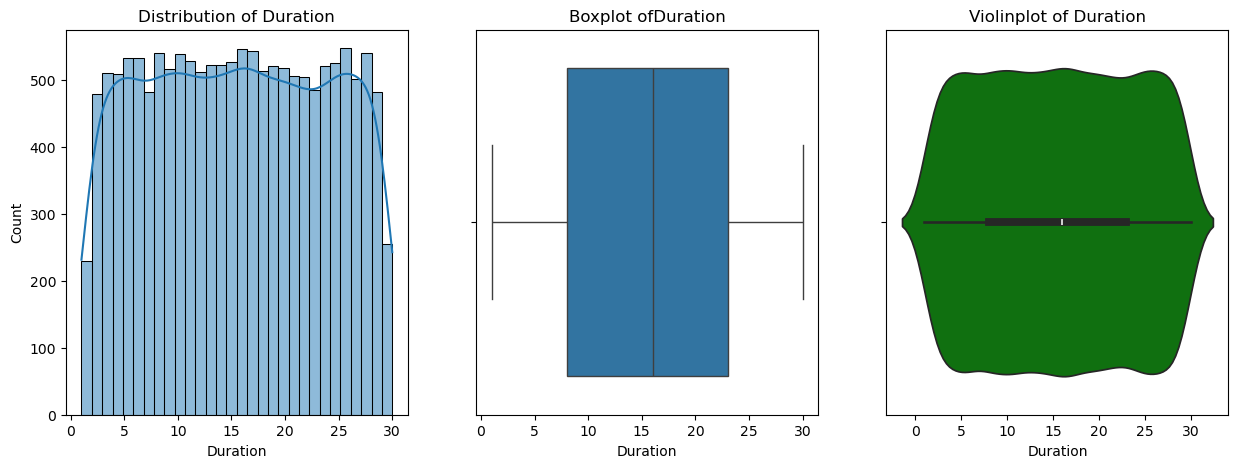

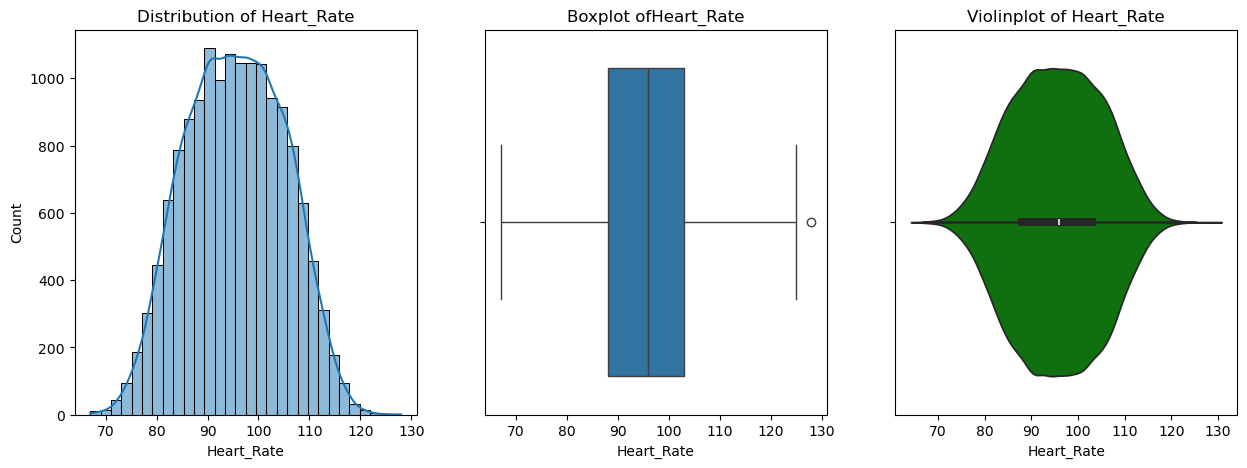

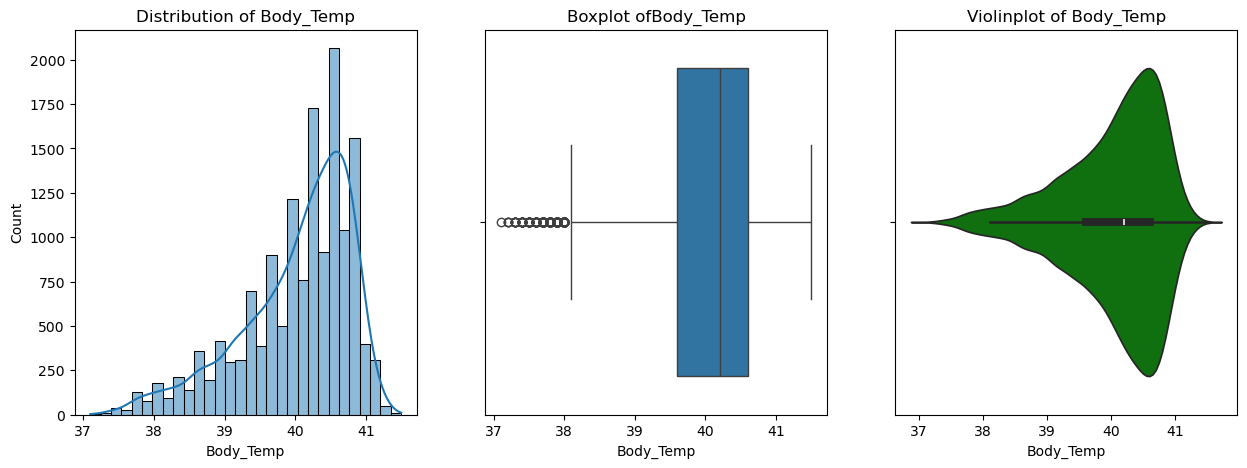

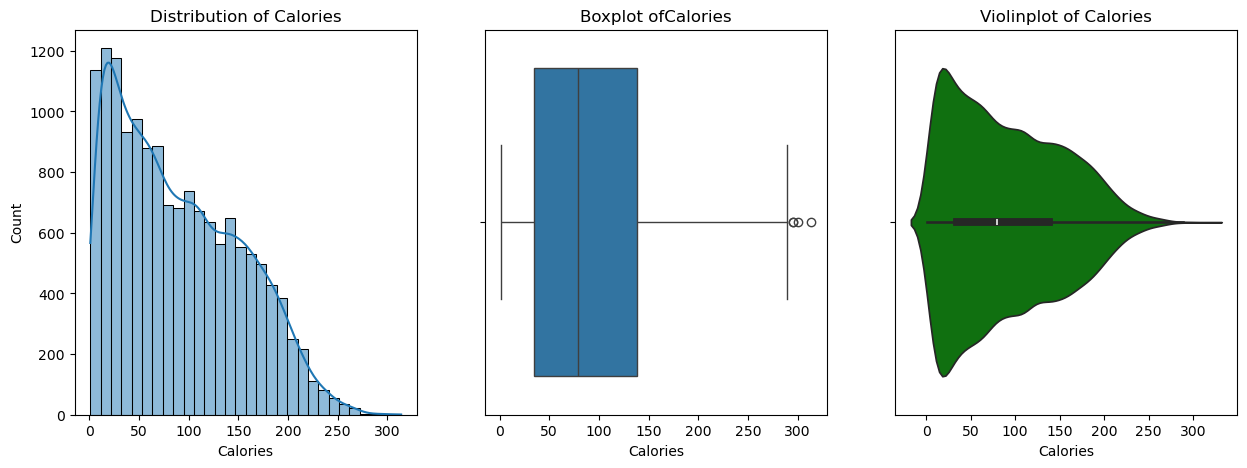

In [12]:

for col in num_cols:
    plt.figure(figsize=((15,5)))
    plt.subplot(1,3,1)
    sns.histplot(data=df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    
    plt.subplot(1,3,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of{col}')

    plt.subplot(1,3,3)
    sns.violinplot(x=df[col], color='Green')
    plt.title(f'Violinplot of {col}')
    plt.show()


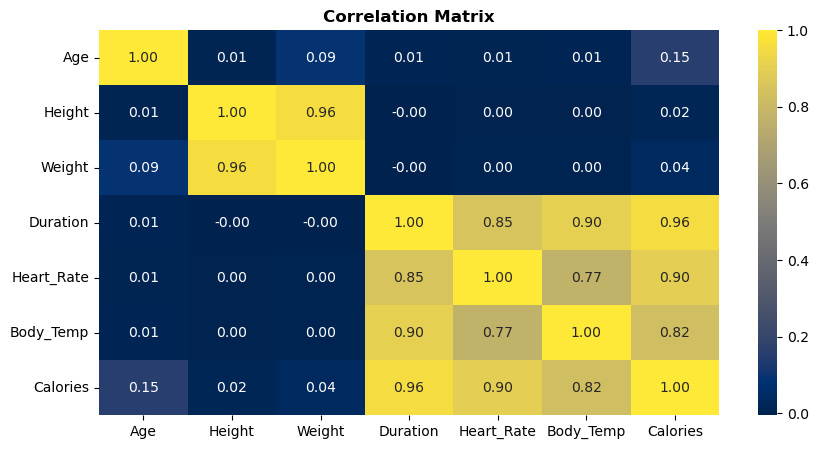

In [13]:
#correlation 
plt.figure(figsize=(10,5))
heatmap=df[num_cols].corr()
sns.heatmap(data=heatmap,fmt='.2f',annot=True, cmap='cividis')
plt.title('Correlation Matrix', fontweight='bold')
plt.show()

- Deal  with outliers 
- Transform target column

## Future construction


$$BMI=\frac{weight}{{Height}^2}$$

In [16]:
df['BMI']=df['Weight']/(df['Height']/100) **2

In [17]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'BMI'],
      dtype='object')

In [18]:
df['Age group']=pd.cut(df['Age'],bins=[0,30,50,80],labels=['Adult','Middle Age','Old Age'])

In [19]:
df.Age.unique()

array([68, 20, 69, 34, 27, 36, 33, 41, 60, 26, 21, 66, 32, 53, 39, 46, 50,
       67, 31, 48, 29, 42, 62, 38, 25, 24, 22, 74, 70, 44, 61, 63, 54, 47,
       35, 28, 77, 64, 45, 57, 49, 40, 55, 23, 43, 52, 79, 51, 59, 30, 37,
       56, 58, 78, 73, 76, 72, 65, 71, 75], dtype=int64)

In [20]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'BMI', 'Age group'],
      dtype='object')

### Data splitting/prepartion 


In [22]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'BMI', 'Age group'],
      dtype='object')

In [23]:
x=df.drop(columns=['User_ID', 'Calories'])
y=df['Calories']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
x_train ,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) 

In [26]:
num_cols=x.select_dtypes(include=np.number).columns.tolist()
cat_cols=x.select_dtypes(include=['category','object']).columns.tolist()


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   User_ID     15000 non-null  int64   
 1   Gender      15000 non-null  object  
 2   Age         15000 non-null  int64   
 3   Height      15000 non-null  int64   
 4   Weight      15000 non-null  int64   
 5   Duration    15000 non-null  int64   
 6   Heart_Rate  15000 non-null  int64   
 7   Body_Temp   15000 non-null  float64 
 8   Calories    15000 non-null  int64   
 9   BMI         15000 non-null  float64 
 10  Age group   15000 non-null  category
dtypes: category(1), float64(2), int64(7), object(1)
memory usage: 1.2+ MB


In [28]:
num_cols

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'BMI']

In [29]:
cat_cols

['Gender', 'Age group']

# pipeline 

In [31]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Create a pipeline for the processing 

In [33]:
num_pipeline=Pipeline(steps=[
    ('scaler',StandardScaler())
])

cat_pipeline=Pipeline(steps=[
    ('encoder',OneHotEncoder())
])

In [34]:
### apply the preprocessing 
preprocessor=ColumnTransformer(transformers=[
    ('num', num_pipeline,num_cols),
    ('cat',cat_pipeline,cat_cols)
])

In [35]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Height', 'Weight', 'Duration',
                                  'Heart_Rate', 'Body_Temp', 'BMI']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Gender', 'Age group'])])

In [36]:
cat_pipeline

Pipeline(steps=[('encoder', OneHotEncoder())])

In [37]:
## define models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score

In [38]:
# define the models
models ={
    'Liner Regression': LinearRegression(),
    'Decion Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Boost':GradientBoostingRegressor(random_state=42),
    'SVR':SVR()
}

In [39]:
result={}
for name,model in models.items():
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('model',model)
    ])


    #train the model
    pipeline.fit(x_train,y_train)


    #predict 
    y_pred=pipeline.predict(x_test)
    mse=mean_squared_error(y_pred,y_test)
    rmse=root_mean_squared_error(y_pred,y_test)
    score=r2_score(y_pred,y_test)
    #combining 
    result[name]={
        'MSE':mse,   
        'RMSE':rmse,
        'R2 SCORE':score
    }

#print metrics
print('\nClassification Metrics')
metrics_df=pd.DataFrame(result).T
print(metrics_df.round(3))


Classification Metrics
                      MSE    RMSE  R2 SCORE
Liner Regression  125.899  11.220     0.967
Decion Tree        31.268   5.592     0.992
Random Forest       7.595   2.756     0.998
Boost              13.162   3.628     0.997
SVR                37.975   6.162     0.990


# Transforming the Target Column

In [41]:
x_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI,Age group
9839,MALE,37,179,77,7,81,39.5,24.031709,Middle Age
9680,MALE,23,195,87,26,110,40.5,22.879684,Adult
7093,MALE,33,181,77,12,88,40.1,23.503556,Middle Age
11293,FEMALE,66,156,54,9,77,39.5,22.189349,Old Age
820,FEMALE,32,144,49,5,90,39.0,23.630401,Middle Age
...,...,...,...,...,...,...,...,...,...
5191,FEMALE,75,148,51,22,104,40.6,23.283419,Old Age
13418,FEMALE,21,172,67,20,104,40.7,22.647377,Adult
5390,MALE,57,189,92,8,90,39.5,25.755158,Old Age
860,MALE,35,174,76,12,97,40.2,25.102391,Middle Age


In [42]:
from scipy.stats  import boxcox

In [43]:
## The target column needs to be transformed 
df['log_Calories']= np.log1p(df['Calories'])
df['Calories_Sqrt']=np.sqrt(df['Calories'])
df['Box_Calories'],lam =boxcox(df['Calories'])

In [44]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'BMI', 'Age group',
       'log_Calories', 'Calories_Sqrt', 'Box_Calories'],
      dtype='object')

<Axes: xlabel='Box_Calories', ylabel='Count'>

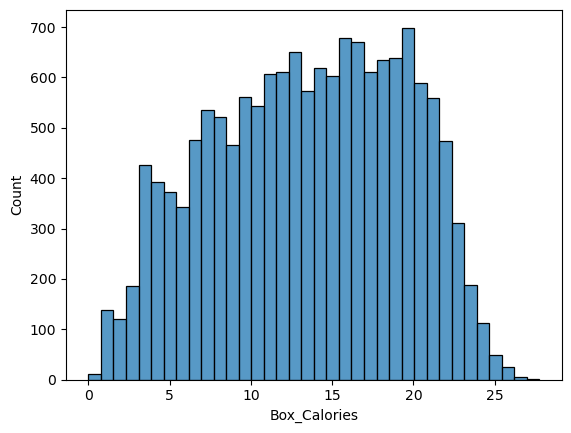

In [45]:
sns.histplot(data=df['Box_Calories'])

In [46]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'BMI', 'Age group',
       'log_Calories', 'Calories_Sqrt', 'Box_Calories'],
      dtype='object')

In [47]:
Targets=['log_Calories','Calories_Sqrt', 'Box_Calories']


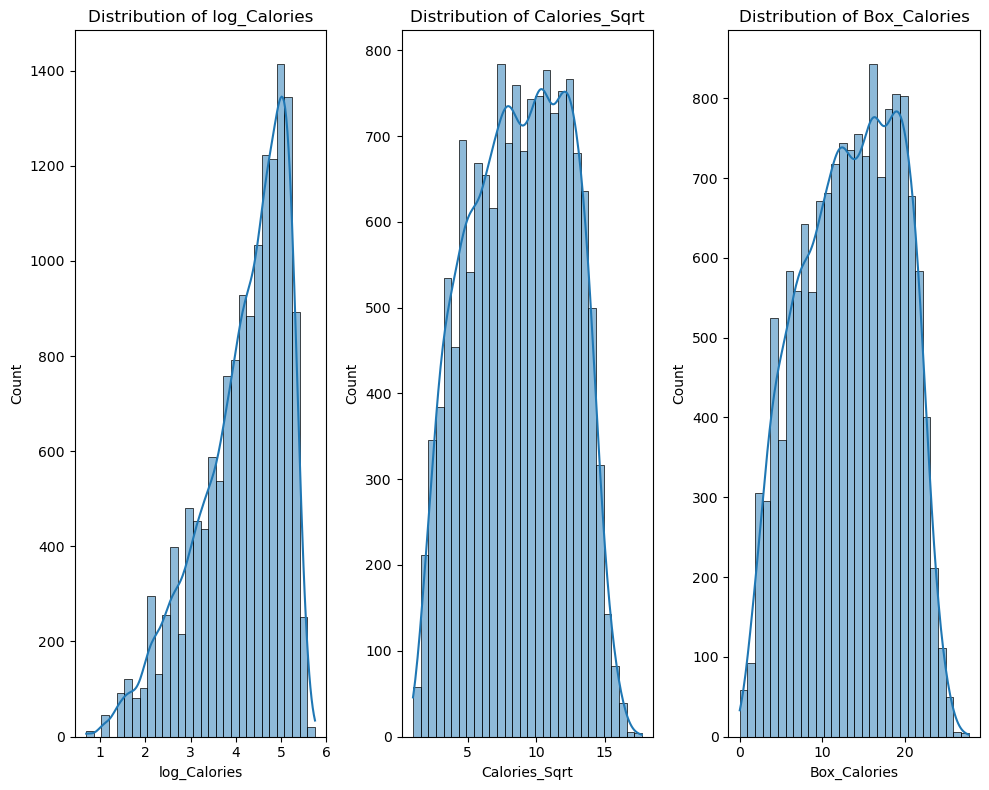

In [48]:
plt.figure(figsize=(10,8))
for i, col in enumerate(Targets,1):
    plt.subplot(1,3,i)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [49]:
df[Targets].skew()

log_Calories    -0.879506
Calories_Sqrt   -0.092261
Box_Calories    -0.157448
dtype: float64

###  After checking the skewness i decided to use Square root transformation because it's the closest to zero , so its the most symmetric of the three


In [51]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'BMI', 'Age group',
       'log_Calories', 'Calories_Sqrt', 'Box_Calories'],
      dtype='object')

In [52]:
x=df.drop(columns=['User_ID', 'Calories','Box_Calories','Calories_Sqrt','log_Calories'])
y=df['Calories_Sqrt']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
num_cols

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'BMI']

In [55]:
cat_cols

['Gender', 'Age group']

In [56]:
result={}
for name,model in models.items():
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('model',model)
    ])


    #train the model
    pipeline.fit(x_train,y_train)


    #predict 
    y_pred=pipeline.predict(x_test)
    mse=mean_squared_error(y_pred,y_test)
    rmse=root_mean_squared_error(y_pred,y_test)
    score=r2_score(y_pred,y_test)
    #combining 
    result[name]={
        'MSE':mse,   
        'RMSE':rmse,
        'R2 SCORE':score
    }

#print metrics
print('\nClassification Metrics')
metrics_df=pd.DataFrame(result).T
print(metrics_df.round(3))


Classification Metrics
                    MSE   RMSE  R2 SCORE
Liner Regression  0.126  0.355     0.990
Decion Tree       0.068  0.261     0.995
Random Forest     0.019  0.138     0.999
Boost             0.027  0.163     0.998
SVR               0.008  0.089     0.999


In [57]:
## After Comparing the the result after transformation and before transformation i noticed the Support Vector Machine 
final_model= RandomForestRegressor()

In [58]:

final_model= RandomForestRegressor()
pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',final_model)
])


#train the model
pipeline.fit(x_train,y_train)





Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Age group'])])),
                ('model', RandomForestRegressor())])

In [59]:
y_pred=pipeline.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
rmse=root_mean_squared_error(y_pred,y_test)
score=r2_score(y_pred,y_test)
#combining 
print(f'{name}: MSE ={mse:.3f}, RMSE={rmse:3f}, Score={score:3f}')

SVR: MSE =0.019, RMSE=0.137734, Score=0.998522


In [60]:
y_train


9839      4.123106
9680     12.922848
7093      6.324555
11293     5.830952
820       4.795832
           ...    
5191     12.288206
13418    10.677078
5390      6.403124
860       7.549834
7270      7.681146
Name: Calories_Sqrt, Length: 12000, dtype: float64

In [61]:
y_pred

array([13.09213383, 13.93654985,  7.27225306, ..., 10.95112463,
        4.43645618, 14.61020434])

<Axes: xlabel='Calories_Sqrt', ylabel='Count'>

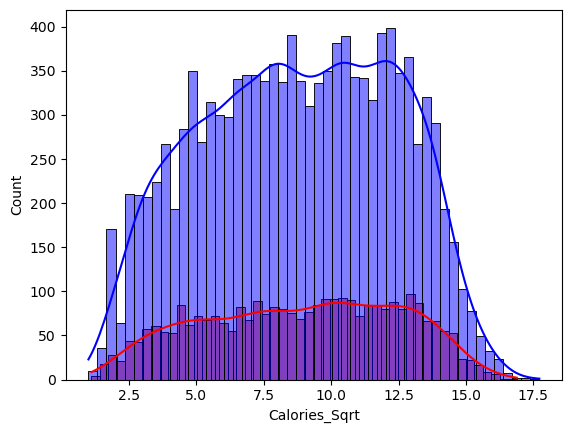

In [62]:
sns.histplot(y_pred,color='red',alpha=0.5,kde=True, bins=50)
sns.histplot(y_train,color='blue',alpha=0.5,kde=True, bins=50)

# Future Importance 

In [64]:
final_model.fit(preprocessor.transform(x_train),y_train)

RandomForestRegressor()

In [65]:
list[preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_cols)]

list[array(['Gender_FEMALE', 'Gender_MALE', 'Age group_Adult',
       'Age group_Middle Age', 'Age group_Old Age'], dtype=object)]

In [66]:
feature_name=(num_cols+list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_cols)))

In [67]:
feature_name

['Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp',
 'BMI',
 'Gender_FEMALE',
 'Gender_MALE',
 'Age group_Adult',
 'Age group_Middle Age',
 'Age group_Old Age']

In [68]:
importance=final_model.feature_importances_

In [69]:
importance

array([1.78475150e-02, 8.13178624e-04, 1.74614817e-03, 9.38516663e-01,
       3.50526710e-02, 3.12704284e-04, 7.40005254e-04, 2.52631709e-03,
       2.08803893e-03, 9.43715698e-05, 9.28492064e-05, 1.69538399e-04])

In [70]:
sort=np.argsort(importance)[::-1]

In [71]:
sort

array([ 3,  4,  0,  7,  8,  2,  1,  6,  5, 11,  9, 10], dtype=int64)

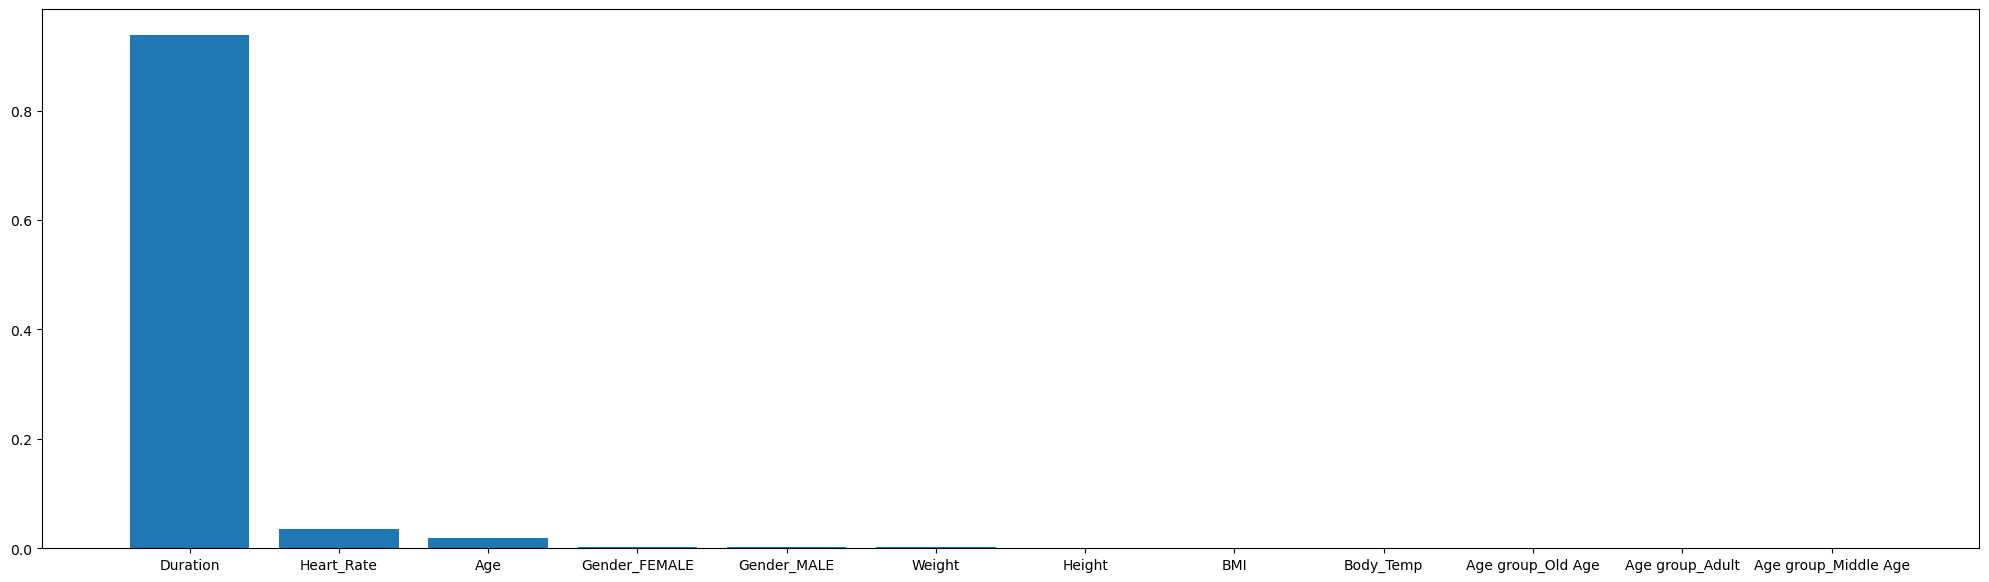

In [72]:
plt.figure(figsize=(25,7))
plt.bar(range(len(importance)),importance[sort])
plt.xticks(range(len(importance)), np.array(feature_name)[sort])
plt.show()

## saving and testin our model

In [74]:
import joblib

In [75]:
final_model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor(random_state=42))
])


In [76]:
#fit on the whole data 
final_model.fit(x,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Age group'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [77]:
#save the model
joblib.dump(final_model, "calorie_predictor.Pkl")

['calorie_predictor.Pkl']

In [78]:
1

1

In [79]:

data= {
    'Gender':['male'],
    'Age':[69],
    'Height':[179],
    'Weight':[79],
    'Duration':[5],
    'Heart_Rate':[88],
    'Body_Temp':[38.7]
    
}



In [80]:
#Load our saved model
import joblib
import pandas as pd
import numpy as np

model=joblib.load('calorie_predictor.Pkl')

In [81]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Age group'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [82]:
#BMI AND DE GROUP


In [83]:
#CREATE OUR DATA FRAME 
df=pd.DataFrame(data)

In [84]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,69,179,79,5,88,38.7


In [85]:
df['Age group']=pd.cut(df['Age'],bins=[0,30,50,80],labels=['Adult','Middle Age','Old Age'])

In [86]:
df['BMI']=df['Weight']/(df['Height']/100) **2

In [87]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Age group,BMI
0,male,69,179,79,5,88,38.7,Old Age,24.65591


In [ ]:
print(f'predicted calorie burn: {prediction[0]:.2f} kcal')